
# Linear Regression
- X-y split (y is the target variable, in this case, "total claim amount")
- Train-test split.
- Standardize the data (after the data split!) *on the training set*.
- Apply linear regression.
- Model Interpretation.
- make a dataframe to show real vs perdicted


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
file = 'https://raw.githubusercontent.com/Shacham-R/Shacham.R.Labs-Ironhack/main/Week4/Labs/marketing_customer_analysis_clean.csv'
df = pd.read_csv(file)
df = df.dropna()

In [4]:
num = df.select_dtypes('number')
num.drop(columns=['unnamed:_0'],inplace=True)
num.drop(axis=1,columns=['total_claim_amount'],inplace=True)

In [5]:
num.head(1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,4809.21696,48029,61,7.0,52,0.0,9,2


## Preproccessing  - categorical variables encoding

In [6]:
cat = df.select_dtypes(exclude='number')
cat.drop(columns=['customer','state','effective_to_date'],inplace=True,errors='Ignore')
cat_encoded = pd.get_dummies(cat,drop_first=True)
cat_encoded.head(1)

,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [7]:
final_df = pd.concat([num, cat_encoded],axis=1)

### Xy split

In [8]:
#splitting the data

X = final_df #the numericals columns, apart from 'total_claim_amount'
y = df['total_claim_amount']

In [9]:
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_Yes,coverage_Extended,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,4809.216960,48029,61,7.000000,52,0.000000,9,2,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2228.525238,0,64,3.000000,26,0.000000,1,1,False,False,...,False,True,False,False,False,False,False,False,True,False
2,14947.917300,22139,100,34.000000,31,0.000000,2,2,False,False,...,False,True,False,False,False,True,False,False,True,False
3,22332.439460,49078,97,10.000000,3,0.000000,2,1,True,True,...,True,False,False,False,False,False,False,False,True,False
4,9025.067525,23675,117,15.149071,31,0.384256,7,1,False,False,...,True,False,False,False,False,False,False,False,True,False


# Creating the model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

### Scaling

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train) #fitting for the training data
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [13]:
'''from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
y_traina = pd.array(y_train).reshape(-1,1)
pt.fit(y_traina)
y_train_t = pt.transform(y_traina)
y_test_t = pt.transform(pd.array(y_test).reshape(-1,1))
y_test = y_test_t
y_train = y_train_t'''

'from sklearn.preprocessing import PowerTransformer\npt = PowerTransformer()\ny_traina = pd.array(y_train).reshape(-1,1)\npt.fit(y_traina)\ny_train_t = pt.transform(y_traina)\ny_test_t = pt.transform(pd.array(y_test).reshape(-1,1))\ny_test = y_test_t\ny_train = y_train_t'

## Modeling

In [14]:
lm = LinearRegression()

In [15]:
model = lm.fit(X_train, y_train)

# Real vs. Predicted dataframe

In [16]:
y_pred = np.array(model.predict(X_test))

In [17]:
y_test.reset_index(drop=True)

0       340.800000
1       195.153339
2       770.400000
3       336.000000
4       561.600000
           ...    
2723    345.600000
2724    664.280864
2725    684.000000
2726     25.713622
2727    497.684017
Name: total_claim_amount, Length: 2728, dtype: float64

In [18]:
real_vs_pred = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})

In [19]:
real_vs_pred

,y_test,y_pred
1250,340.800000,377.926242
5438,195.153339,306.244808
10156,770.400000,720.706963
3441,336.000000,383.876682
682,561.600000,641.598750
...,...,...
5063,345.600000,396.123423
10053,664.280864,618.785811
3453,684.000000,645.251071
9241,25.713622,233.843123


In [20]:
real_vs_pred['residuals'] = real_vs_pred.apply(lambda row: row.y_test - row.y_pred, axis=1)
real_vs_pred.head()

,y_test,y_pred,residuals
1250,340.800000,377.926242,-37.126242
5438,195.153339,306.244808,-111.091469
10156,770.400000,720.706963,49.693037
3441,336.000000,383.876682,-47.876682
682,561.600000,641.598750,-79.998750


In [21]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [22]:
model_mse = mse(y_test, y_pred)
model_r2 = r2(y_test, y_pred)
model_rmse = np.sqrt(model_mse)

In [23]:
model_r2, model_mse, model_rmse

(0.7649079551422762, 21382.30339560706, 146.2268901249256)

### Feature importence

In [24]:
model.coef_

array([-5.46882290e-01, -9.37679193e+00,  1.73597172e+02,  2.56570057e+00,
       -1.64244748e+00, -1.14602601e+00,  3.03765089e+00, -1.57614825e-01,
       -8.07273283e+00, -5.19742740e+00, -2.00340257e+00, -2.98424370e+00,
       -1.06197536e+00,  5.59955203e+00, -1.28683731e+00, -5.51272264e+00,
        9.36577946e-01, -2.13787785e+00,  2.66121710e+01,  8.09665014e+00,
        1.82078276e+02,  8.38620964e+01, -3.57432727e+00,  2.92676095e+01,
        1.40097200e+15,  1.54577725e+15, -1.49738908e+00,  1.07813711e+00,
       -1.09904447e+15, -1.37237299e+15, -1.56374709e+15, -6.61779136e+14,
       -1.03028544e+15, -9.77216653e+14,  6.77773403e+00,  2.10406591e+00,
        1.20322674e+00,  1.26183111e+00,  6.91209975e-01,  1.27871206e+00,
        5.78928598e+00, -2.46483244e+00, -3.79653747e+00, -4.50980088e+00,
       -2.56667022e-01, -4.38603387e+00, -2.05604073e+00])

In [25]:
model.intercept_

434.2261740850536

In [26]:
fi_df = pd.DataFrame({'var':X_train.columns, 'coef':model.coef_})

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50')])

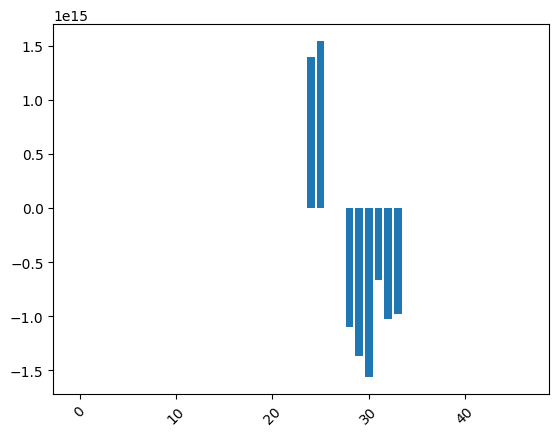

In [27]:
plt.bar(x=fi_df["var"],height=fi_df["coef"])
plt.xticks(rotation=45)

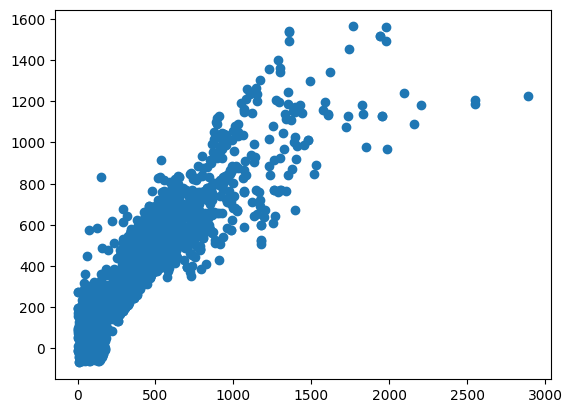

In [28]:
plt.scatter(x=y_test,y=y_pred)

In [29]:
#pt.inverse_transform(predicted) # to get the actual, non transformed value

# LAB | 27.11.23 Instructions
- Fit the models LinearRegression, Lasso and Ridge and compare the model performances.
- Define a function that takes a list of models and trains (and tests) them so we can try a lot of them without repeating code.
- Use feature selection techniques (P-Value, RFE) to select a subset of features to train the model with.
- (optional) Refit the models with the selected features.

In [ ]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
models = ['LinearRegression','Lasso','Ridge']

def models_to_test(models):
    for model in models:
        model_test(model)
        

def data_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test  = pd.DataFrame(X_test, columns=X.columns)


def model_test(model):
    pass



def feature_selection():
    pass


    
def model_metrics(y_test,y_pred):
    model_mse = mse(y_test, y_pred)
    model_r2 = r2(y_test, y_pred)
    model_rmse = np.sqrt(model_mse)
    return model_mse,model_r2,model_rmse


def linearregression(X_train, y_train):
    model=LinearRegression()
    
    model.fit(X_train, y_train)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


def lasso(X_train, y_train):
    model=Lasso(alpha=0)

    model.fit(X_train, y_train)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


def ridge(X_train, y_train):
    model=Ridge(alpha=0)
    model.fit(X_train, y_train)
    print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

